In [ ]:
#Problem_01: Use the Bollywood Dataset to Answer Questions 1 to 12. 

The data file bollywood.csv contains box office collection and social media promotion information about  movies released in 2013−2015 period. Following are the columns and their descriptions. ▪ SlNo – Release Date 

▪ MovieName – Name of the movie 

▪ ReleaseTime – Mentions special time of release. LW (Long weekend), FS (Festive Season), HS (Holiday Season), N (Normal) 

▪ Genre – Genre of the film such as Romance, Thriller, Action, Comedy, etc. 

▪ Budget – Movie creation budget 

▪ BoxOfficeCollection – Box office collection 

▪ YoutubeViews – Number of views of the YouTube trailers 

▪ YoutubeLikes – Number of likes of the YouTube trailers 

▪ YoutubeDislikes – Number of dislikes of the YouTube trailers 

Use Python code to answer the following questions: 

1. How many records are present in the dataset? Print the metadata information of the dataset. 

2. How many movies got released in each genre? Which genre had highest number of releases? Sort number of releases in each genre in descending order. 

3. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.) 

4. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.) 

5. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more? 

6. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget. 

7. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the  average ROI for different release times. 

8. Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the plot  to conclude if the most movies are high or low budgeted movies. 

9. Compare the distribution of ROIs between movies with comedy genre and drama. Which genre typically sees higher ROIs? 

10. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative? 

11. Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies to compare. 

12. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? 

In [1]:
#1. How many records are present in the dataset? Print the metadata information.

import pandas as pd
# Load the dataset
df = pd.read_csv('Bollywood.csv')
# Number of records
print("Number of records:", len(df))
# Metadata information
print("\nMetadata Information:")
print(df.info())


Number of records: 149

Metadata Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


In [2]:
#2.Movies released in each genre (sorted in descending order). Which genre had the highest releases?

genre_counts = df['Genre'].value_counts().sort_values(ascending=False)
print("Genre-wise releases:\n", genre_counts)
print("\nGenre with highest releases:", genre_counts.idxmax())

Genre-wise releases:
 Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64

Genre with highest releases: Comedy


In [3]:
#3. Cross-tabulation between Genre and ReleaseTime
cross_tab = pd.crosstab(df['Genre'], df['ReleaseTime'])
print(cross_tab)


ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


In [4]:
#4. Month with maximum movie releases
df['Month'] = pd.to_datetime(df['Release Date'], format='%d-%b-%y').dt.month_name()
month_counts = df['Month'].value_counts()
print("Month with maximum releases:", month_counts.idxmax())

Month with maximum releases: January


In [5]:
#5. Month with most high-budget movies (≥25 crore)
high_budget = df[df['Budget'] >= 25]
print("Month with most high-budget releases:",
high_budget['Month'].value_counts().idxmax())


Month with most high-budget releases: February


In [6]:
#6. Top 10 movies by ROI
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_roi = df.sort_values('ROI', ascending=False).head(10)[['MovieName', 'ROI']]
print(top_roi)

                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


In [7]:
#7. Average ROI by ReleaseTime
avg_roi = df.groupby('ReleaseTime')['ROI'].mean().sort_values(ascending=False)
print("Average ROI by release time:\n", avg_roi)

Average ROI by release time:
 ReleaseTime
LW    1.127205
FS    0.973853
HS    0.850867
N     0.657722
Name: ROI, dtype: float64


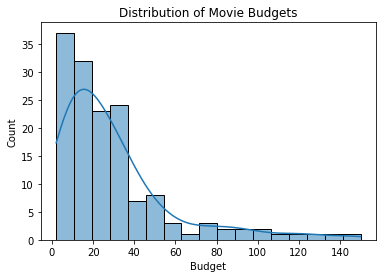

In [8]:
#8. Distribution of movie budgets (Histogram & KDE Plot)
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Budget'], kde=True)
plt.title("Distribution of Movie Budgets")
plt.show()

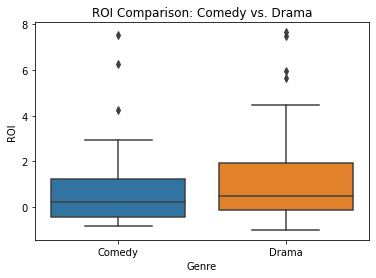

In [9]:
#9. ROI comparison: Comedy vs. Drama
sns.boxplot(x='Genre', y='ROI', data=df[df['Genre'].isin(['Comedy', 'Drama'])])
plt.title("ROI Comparison: Comedy vs. Drama")
plt.show()

In [10]:
#10. Correlation between Box-office collection and YouTube likes
correlation = df[['BoxOfficeCollection', 'YoutubeLikes']].corr().iloc[0,1]
print("Correlation (BoxOffice vs. Likes):", correlation)

Correlation (BoxOffice vs. Likes): 0.6825165877731293


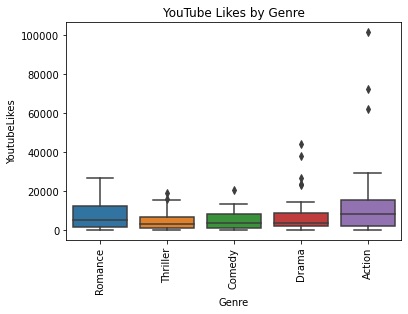

In [11]:
#11. Genre with most YouTube likes (Boxplot)
sns.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.xticks(rotation=90)
plt.title("YouTube Likes by Genre")
plt.show()

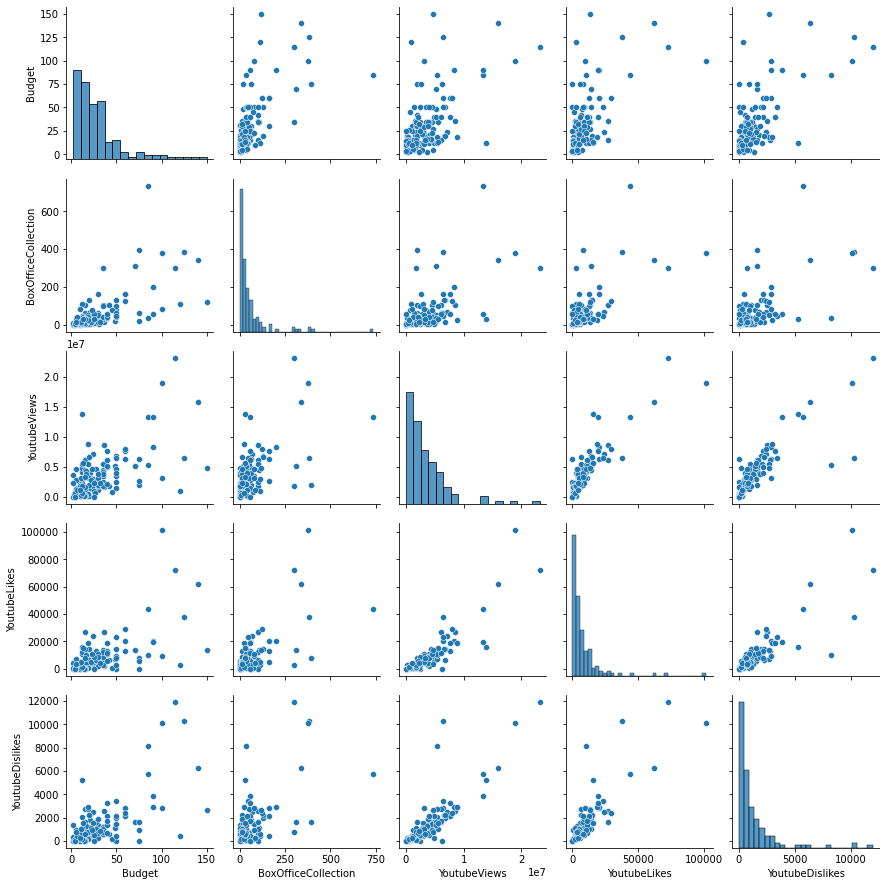

In [12]:
#12. Pairplot for highly correlated variables
sns.pairplot(df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes',
'YoutubeDislikes']])
plt.show()